In [1]:
pip install control

In [2]:
import control
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Define transfer function of the system
s = control.tf('s')

# Process

In [4]:
Kp_Process = 1.2
Tau_Process = 40.0
Delay_Process = 200.0

In [5]:
G_Process = Kp_Process/(Tau_Process*s+1)

In [6]:
num, den = control.pade(Delay_Process, n=2, numdeg=0)
Pade_Process = control.tf(num, den)

In [7]:
FOPDT_Process = control.series(G_Process, Pade_Process)

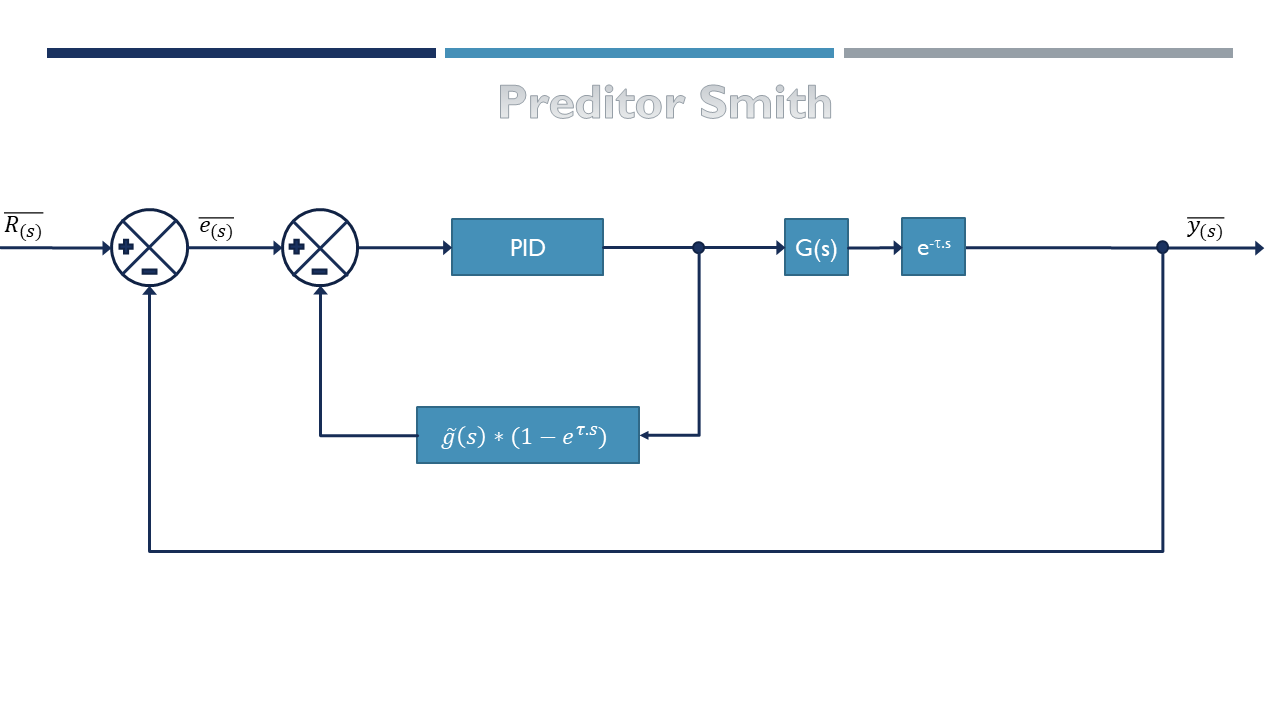


## Inner Level

In [8]:
Kc = 0.80
ti = 50.0
td = 10.0

In [9]:
# Define transfer function of the PID Controller
PIDControl = Kc *(1 + (1/(ti*s)) + (td*s))

In [10]:
Kp_Process_tilde = 1.2
Tau_Process_tilde = 40.0
Delay_Process_tilde = 200.0

In [11]:
G_Process_tilde = Kp_Process_tilde/(Tau_Process_tilde*s+1)

In [12]:
num, den = control.pade(Delay_Process_tilde, n=2, numdeg=0)
Pade_Process_tilde = control.tf(num, den)

In [13]:
FOPDT_Process_tilde = control.series(G_Process_tilde, Pade_Process_tilde)

In [14]:
Alfa = 1.0

In [15]:
SmithPredictor = Alfa * control.parallel(G_Process_tilde, - FOPDT_Process_tilde)

In [16]:
Inner_Loop = control.feedback(PIDControl, SmithPredictor, sign=-1)

## Outer Level

In [17]:
Outer = control.series(Inner_Loop,FOPDT_Process)

In [18]:
Outer_Loop = control.feedback(Outer, 1, sign=-1)

## System Step Response

In [19]:
t, y = control.step_response(Outer_Loop)

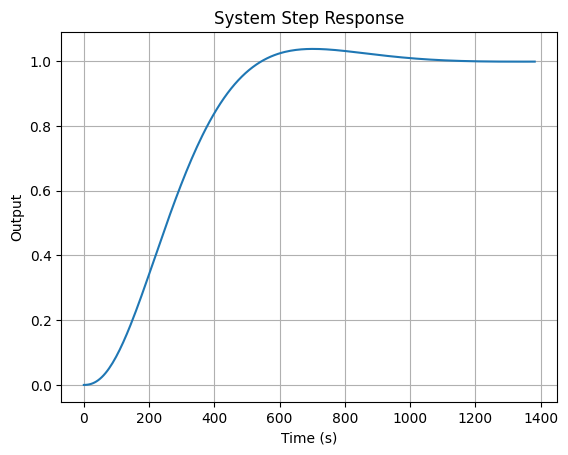

In [20]:
# Plot step response
plt.figure(1)
plt.plot(t, y)
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.title('System Step Response')
plt.grid()
plt.show()